In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
o = pd.read_csv("full.csv")
n = pd.read_csv("full_normalized_relative.csv")

print(o.shape, o["label"].sum())

(80724, 36) 1953.0


In [23]:
(o["label"] - n["label"]).sum()

0.0

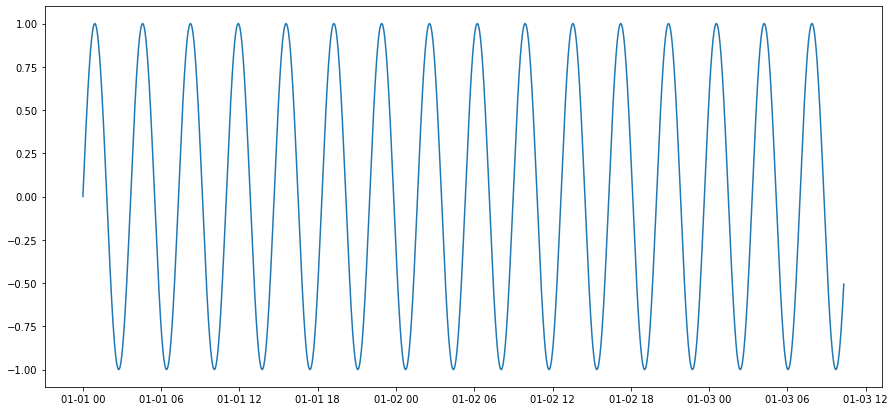

In [16]:
a = pd.DataFrame()
a["t"] = np.linspace(0, 100, 3500)
a["s"] = np.sin(a["t"])
a["t"] = pd.to_datetime("2021-01-01 00:00") + np.arange(3500) * pd.Timedelta(minutes=1)
plt.figure(figsize=(15, 7))
plt.plot(a["t"], a["s"])
a.to_csv("sin.csv", header=None, index=None)

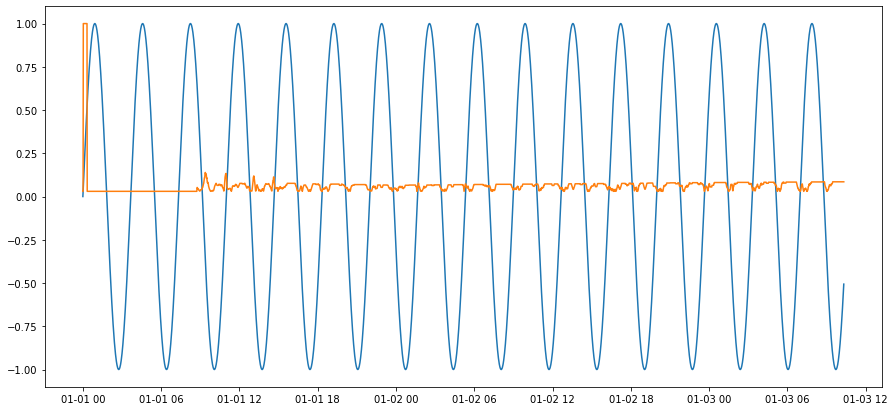

In [21]:
ressin = pd.read_csv("offi/NumentaDetectorTM/NumentaDetectorTM_sin.csv")
ressin["timestamp"] = pd.to_datetime(ressin["timestamp"])
plt.figure(figsize=(15, 7))
plt.plot(ressin["timestamp"], ressin["value"])
plt.plot(ressin["timestamp"], ressin["anomaly_score"])

In [10]:
df = pd.read_csv("data/Yahoo/real_28.csv")
df["gt"] = "Normal"
df["gt"][df["is_anomaly"] == 1] = "Anomalous"

<ipython-input-10-16c29bae8de6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gt"][df["is_anomaly"] == 1] = "Anomalous"


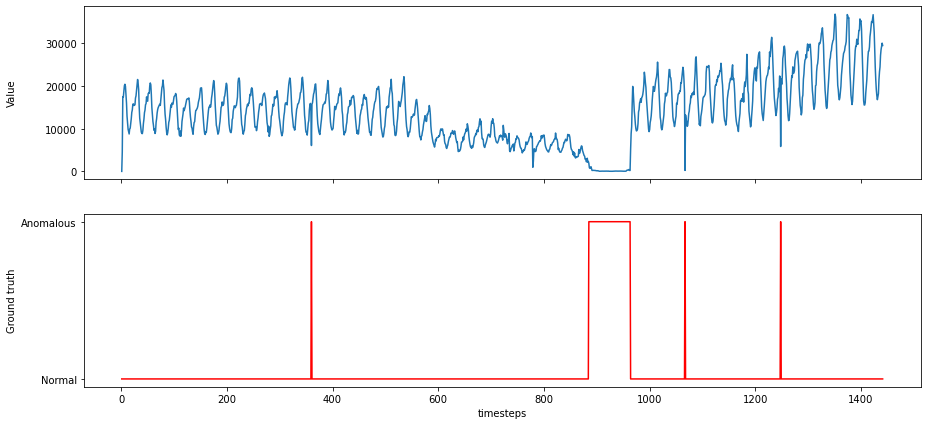

In [15]:
fig, ax = plt.subplots(2, sharex=True, figsize=(15,7))
ax[0].plot(df["timestamp"], df["value"])
ax[0].set_ylabel("Value")
ax[1].plot(df["timestamp"], df["gt"], "red")
ax[1].set_ylabel("Ground truth")
ax[1].set_xlabel("timesteps")
fig.align_ylabels(ax)

In [10]:
df = pd.read_csv("NAB/data/realAWSCloudwatch/ec2_cpu_utilization_fe7f93.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index(df["timestamp"], inplace=True)
anomalies = ["2014-02-17 06:12:00",
             "2014-02-22 00:02:00",
             "2014-02-23 15:17:00"]
windows = [["2014-02-17 00:37:00.000000", "2014-02-17 11:47:00.000000"],
           ["2014-02-21 18:27:00.000000", "2014-02-22 05:37:00.000000"],
           ["2014-02-23 09:42:00.000000", "2014-02-23 20:52:00.000000"]]
df["gt"] = "Normal"
for window in windows:
    start = pd.to_datetime(window[0])
    end = pd.to_datetime(window[1])
    df["gt"][(start < df["timestamp"]) & (df["timestamp"] < end)] = "Anomalous"

<ipython-input-10-962c850b077b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gt"][(start < df["timestamp"]) & (df["timestamp"] < end)] = "Anomalous"


In [12]:
df = pd.read_csv("NAB/data/realTweets/Twitter_volume_GOOG.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index(df["timestamp"], inplace=True)
anomalies = ["2015-03-13 20:22:53",
             "2015-03-14 16:27:53",
             "2015-03-22 22:52:53",
             "2015-04-01 05:27:53"]
windows =[["2015-03-13 03:52:53.000000", "2015-03-15 08:57:53.000000"],
          ["2015-03-22 06:22:53.000000",
            "2015-03-23 15:22:53.000000"
        ],
        [
            "2015-03-31 12:57:53.000000",
            "2015-04-01 21:57:53.000000"
        ]
    ]
df["gt"] = "Normal"
for window in windows:
    start = pd.to_datetime(window[0])
    end = pd.to_datetime(window[1])
    df["gt"][(start < df["timestamp"]) & (df["timestamp"] < end)] = "Anomalous"

<ipython-input-12-688e28ee387e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gt"][(start < df["timestamp"]) & (df["timestamp"] < end)] = "Anomalous"


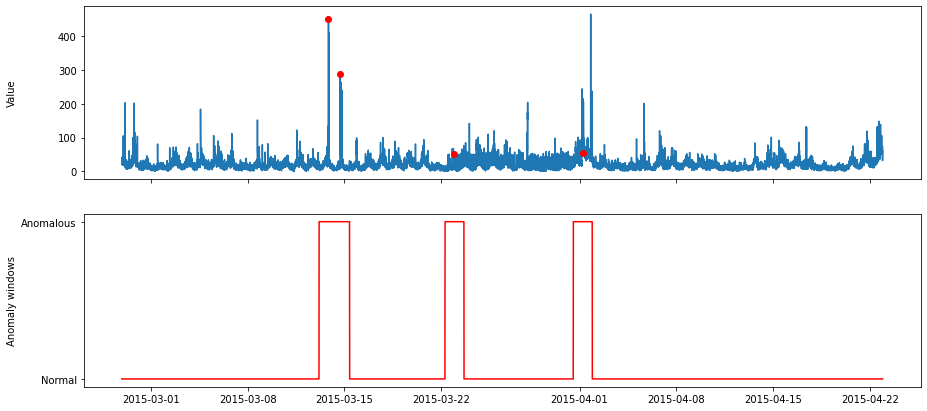

In [13]:
fig, ax = plt.subplots(2, sharex=True, figsize=(15,7))
ax[0].plot(df["timestamp"], df["value"])
ax[0].plot(df["timestamp"][pd.to_datetime(anomalies)], df["value"][pd.to_datetime(anomalies)], "ro")
ax[0].set_ylabel("Value")
ax[1].plot(df["timestamp"], df["gt"], "red")
ax[1].set_ylabel("Anomaly windows")
fig.align_ylabels(ax)

In [14]:
runtimes_yahoo = {'cadose': 0.5611111058129205 / 1450 * 1000,
                  'knn': 2.143333355585734 / 1450 * 1000,
                  'htm': 4.570000012715657 / 1450 * 1000,
                  'skyline': 1.298444430033366 / 1450 * 1000}
runtimes_100k = {'cadose': 121.78399991989136 / 100000 * 1000,
                 'knn': 342.36299991607666 / 100000 * 1000,
                 'htm': 507.1640000343323 / 100000 * 1000,
                 'sklyine': 1934.170000076294 / 100000 * 1000}

In [12]:
runtimes_yahoo

{'cadose': 0.38697317642270374,
 'knn': 1.478160934886713,
 'htm': 3.1517241467004533,
 'skyline': 0.8954789172643903}

In [13]:
runtimes_100k

{'cadose': 1.2178399991989135,
 'knn': 3.4236299991607666,
 'htm': 5.071640000343323,
 'sklyine': 19.341700000762938}

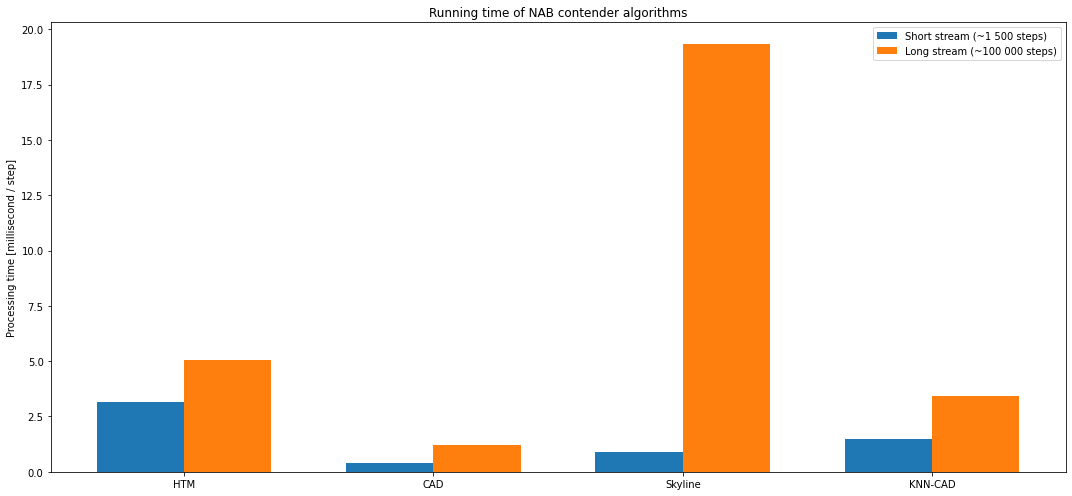

In [17]:
labels = ['HTM', 'CAD', 'Skyline', 'KNN-CAD']
short_times = [runtimes_yahoo['htm'], runtimes_yahoo['cadose'], runtimes_yahoo['skyline'], runtimes_yahoo['knn']]
long_times = [runtimes_100k['htm'], runtimes_100k['cadose'], runtimes_100k['sklyine'], runtimes_100k['knn']]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - width/2, short_times, width, label='Short stream (~1 500 steps)')
rects2 = ax.bar(x + width/2, long_times, width, label='Long stream (~100 000 steps)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Processing time [millisecond / step]')
ax.set_title('Running time of NAB contender algorithms')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()